<a href="https://colab.research.google.com/github/rayrui312/ccxtfinrl_btc/blob/main/demo_stock_wrds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Trading Using WRDS Data in NeoFinRL**






# **Part 1: Install NeoFinRL, ElegantRL and related packages**

In [5]:
!pip install git+https://github.com/AI4Finance-LLC/NeoFinRL.git
!pip install git+https://github.com/AI4Finance-LLC/ElegantRL.git
!pip install yfinance stockstats
!pip install wrds
!pip install trading_calendars

  Cloning https://github.com/AI4Finance-LLC/NeoFinRL.git to /tmp/pip-req-build-l5n5ubce
  Running command git clone -q https://github.com/AI4Finance-LLC/NeoFinRL.git /tmp/pip-req-build-l5n5ubce
  Created wheel for neofinrl: filename=neofinrl-0.0.1-cp37-none-any.whl size=70711 sha256=a6688556d0321e542ba39c3d0f34d017388ab0f17d29fd56c690f03dd300e778
  Stored in directory: /tmp/pip-ephem-wheel-cache-08sia8q1/wheels/fa/c0/c9/bf3369bebc879bb6d0f2fbbe67715776c0dc1302dfa94ccd8f
Successfully built neofinrl
  Cloning https://github.com/AI4Finance-LLC/ElegantRL.git to /tmp/pip-req-build-txf7lp1l
  Running command git clone -q https://github.com/AI4Finance-LLC/ElegantRL.git /tmp/pip-req-build-txf7lp1l
     |████████████████████████████████| 79.0MB 67kB/s 
     |████████████████████████████████| 450kB 40.5MB/s 
  Created wheel for elegantrl: filename=elegantrl-0.3.1-cp37-none-any.whl size=65369 sha256=3caa79f25d2076a47334788cc7c477fc18dfe09358d57eeb0511dfc53e508899
  Stored in directory: /tmp/pip-e

# **Part 2: Import Packages**


*   **NeoFinRL**
*   **ElegantRL**



In [6]:
from elegantrl.run import *
from neo_finrl.wrds.wrds_engineer import WrdsEngineer
from neo_finrl.wrds.env_stock_wrds import StockTradingEnv
from elegantrl.agent import *

# **Part 3: Data Fetching and Pre-processing**

*   **WrdsEngineer**: An aggregation class of data fetching and pre-processing for WRDS database
*   **WrdsEngineer.data_fetch_ohlcv**: Download data by sending sql query to WRDS and preprocessing the raw data to get ohlcv (open, high, low, close, volume) dataframe.
*   **WrdsEngineer.data_clean**: Clean the ohlcv data. (Fill up missing rows and missing values.)
*   **WrdsEngineer.add_technical_indicators**: Add technical indicators to cleaned ohlcv data.
*   **WrdsEngineer.df_to_ary**: Transform the fully preprocessed dataframe into numpy arrary (to put into the environment).



> After calling this methods step by step, we will finally get a numpy array to directly put into our environment.




In [ ]:
# Data Fetching
#DOW_30_TICKER
stock_list = ["AAPL","MSFT","JPM","V","RTX","PG","GS","NKE","DIS","AXP","HD",
        "INTC","WMT","IBM","MRK","UNH","KO","CAT","TRV","JNJ","CVX",
        "MCD","VZ","CSCO","XOM","BA","MMM","PFE","WBA","DD"]
tech_indicator_list = ['macd','boll_ub','boll_lb','rsi_30','dx_30',
                       'close_30_sma','close_60_sma']
# initialize WrdsEngineer, please fill in your own account info
WE = WrdsEngineer() 
# fetch raw data and calculate ohlcv 
df = WE.data_fetch_ohlcv(start='2021-01-01',end='2021-01-21',stock_list=stock_list, time_interval=60,
                         if_save_tempfile=False)
"""The raw data from WRDS TAQ database is very large. The step above may take hours!!!
Here we strongly recommend you save the temp file locally by setting 
if_save_tempfile=True."""
# clean the ohlcv data
df = WE.data_clean(df)
# add technical indicators
df = WE.add_technical_indicators(df,tech_indicator_list=tech_indicator_list)
print(df.head())
# transform dataframe to numpy array
ary = WE.df_to_ary(df, tech_indicator_list)
""" You can also save the final array file locally by adding
np.save('xxx',ary)"""
print(ary[:10])


# **Part 4: Train, Evaluate and Backtest the Agent by ElegantRL**

See https://github.com/AI4Finance-LLC/ElegantRL/blob/master/eRL_demo_StockTrading.ipynb for more demonstrations.






In [7]:
args = Arguments(if_on_policy=True)
args.agent = AgentPPO()

#choose environment
args.env = StockTradingEnv(ary = ary, stock_dim = 30, if_train=True)
args.env_eval = StockTradingEnv(ary = ary, stock_dim = 30, if_train=False)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8
args.break_step = int(5e5)

train_and_evaluate(args)

env = StockTradingEnv(ary=ary, stock_dim=30 ,if_train=False)
args = Arguments(if_on_policy=True)
args.agent = AgentPPO()
args.env = StockTradingEnv(ary=ary, stock_dim = 30, if_train=False)
args.if_remove = False
args.cwd = './AgentPPO/Stock_wrds-v1_0'
args.init_before_training()

env.draw_cumulative_return(args, torch)

| GPU id: 0, cwd: ./AgentPPO/Stock_wrds-v1_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC |  avgS  stdS
0   7.10e+03      1.05 |
0   7.10e+03      1.05 |    1.05      0.00       0.06      0.02 |  1013     0
0   1.42e+04      1.05 |    1.02      0.00       0.29      0.01 |  1013     0
0   2.13e+04      1.05 |    1.03      0.00       0.14      0.07 |  1013     0
0   2.84e+04      1.05 |    1.03      0.00       0.18      0.08 |  1013     0
0   3.55e+04      1.05 |    1.02      0.00       0.17      0.06 |  1013     0
0   4.26e+04      1.05 |    0.99      0.00       0.12      0.00 |  1013     0
0   4.97e+04      1.05 |    0.99      0.00       0.17      0.04 |  1013     0
0   5.68e+04      1.05 |    0.99      0.00       0.18      0.01 |  1013     0
0   6.39e+04      1.05 |    0.96      0.00       0.16      0.02 |  1013     0
0   7.10e+04      1.05 |    0.98      0.00       0.17      0.00 |  1013     0
0   7.81e+04      1.05 |    1.00      0.00       0.19  

[0.9999582054744706,
 0.9998697794989394,
 0.9997815491954077,
 0.9816760269226112,
 0.9982174832436048,
 0.9981505949133206,
 0.998174767387467,
 0.9981842929703372,
 0.9980826186677039,
 0.9979927946130125,
 0.9980128004818435,
 0.9979491235523446,
 0.997950057158042,
 0.9978688023066237,
 0.9977688871527819,
 0.997590915056724,
 0.9974798884851261,
 0.9975092001425028,
 1.011799042672329,
 1.011953915858813,
 1.0118615847661676,
 1.011937285564322,
 1.012026657913432,
 1.0119525798539435,
 1.0120772514841745,
 1.0120132210681565,
 1.0120299535612742,
 1.0120364510019477,
 1.0120831375344743,
 1.0122126139018024,
 1.0118935848865223,
 0.9768551145898311,
 1.012146363717738,
 1.0119252227692679,
 1.0120144841971745,
 1.0124282485872362,
 1.0127693551633326,
 1.013769409468197,
 1.0130878444548004,
 1.013345625243525,
 1.0131046358878522,
 1.0131217342303012,
 1.013056572973549,
 0.9780211547240754,
 1.0130633081924731,
 1.0133263761645244,
 1.0133167728189947,
 1.0133097527695436,
 1.

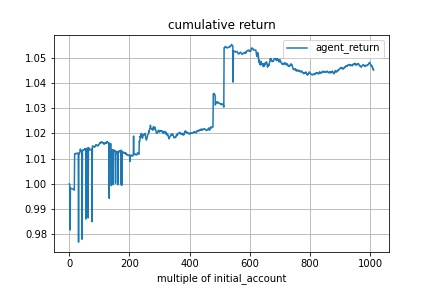